# Code Quick Start 

A handy set of commands that can be copy and pasted to run CFL quickly. 

We recommend running `cfl` from within either a python script (i.e. a `.py` file) or a Jupyter Notebook. A python script can be easier to run quickly, but a Jupyter Notebook is more interactive.

### 1. Import CFL

In [1]:
from cfl.experiment import Experiment
from sklearn.cluster import KMeans # replace this import if using a different clustering method

### 2. Load your data as a numpy array 

In [2]:
# generate random data (replace this with your actual data)
n_samples = 500 

import numpy as np
X = np.random.random((n_samples, 40)) # X data has 40 features
Y = np.random.random((n_samples, 3))  # Y data has only 3 features 

# print the data shape 
# both data sets should be in the shape (n_samples, n_features) (unless using a CNN) 
print(X.shape)
print(Y.shape)

(500, 40)
(500, 3)


### 3. Create parameter dictionaries 

In [3]:
# Create 3 dictionaries: one for data info, one with CDE parameters, and one with cluster parameters

# the parameters should be passed in dictionary form 
data_info = {'X_dims' : X.shape, 
             'Y_dims' : Y.shape, 
             'Y_type' : 'continuous' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not 
# allowed for data_info)
CDE_params = {  'dense_units' : [50, data_info['Y_dims'][1]], # model creation parameters
                'activations' : ['relu', 'linear'],
                'dropouts'    : [0, 0],

                'batch_size'  : 32, # parameters for training 
                'n_epochs'    : 20,
                'optimizer'   : 'adam',
                'opt_config'  : {},
                'loss'        : 'mean_squared_error',
                'best'        : True, 

                'verbose'     : 1, # amount of output to print 
                'show_plot'   : True,
            }

# cluster_params consists of two already created clustering objects 
cluster_params = {  'x_model' : KMeans(n_clusters=4),  
                    'y_model' : KMeans(n_clusters=2)
                 }   

### 4. Set up the CFL pipeline 

In [4]:
block_names = ['CondExpMod', 'Clusterer'] # block_names indicates which CDE and clustering models to use 
block_params = [CDE_params, cluster_params] # block_params is aligned to block_names

save_path = 'sample_run' # directory to save results to 

# Create a new CFL experiment with specified parameters
my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, results_path=save_path)

All results from this run will be saved to sample_run\experiment0001
weights_path not specified in input, defaulting to None
standardize not specified in input, defaulting to False
verbose specified but not used by this block type


### 5. Train the CFL model on the data 

Training CFL pipeline.
Epoch 1/20
12/12 [==============================] - 2s 99ms/step - loss: 0.4244 - val_loss: 0.1362
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1433 - val_loss: 0.1416
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1408 - val_loss: 0.1172
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.1212 - val_loss: 0.1177
Epoch 5/20
12/12 [==============================] - 0s 8ms/step - loss: 0.1180 - val_loss: 0.1110
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 0.1046 - val_loss: 0.1096
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.1075 - val_loss: 0.1080
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.1049 - val_loss: 0.1058
Epoch 9/20
12/12 [==============================] - 0s 7ms/step - loss: 0.1000 - val_loss: 0.1067
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0966 - val_loss: 0.

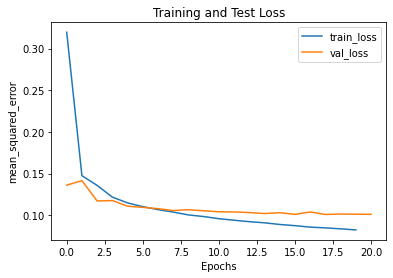

100%|██████████| 500/500 [00:00<00:00, 35713.83it/s]Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  sample_run\experiment0001\trained_blocks\CondExpMod



In [5]:
results = my_exp.train()

### 6. Visualizing Results 

COMING SOON! 

In order to interpret the output of CFL, it's necessary to visualize those results. Check back soon for more default visualizations, or look through the `cfl.visualization_methods` submodule to see what we have already.  


### 7. Tuning CFL

Once you've set up a CFL pipeline, it needs to be tuned like any other machine learning model. 

To tune the CDE step, play with the parameters used in model creation/training (in `CDE_params`), or swap in another CDE entirely (available models can be found in `cfl.density_estimation_methods`). 

To tune the clustering step, change the parameters of the clustering models you use or substitute in different clustering method(s). 

Use the customary techniques for tuning machine learning hyperparameters to assist you. 